In [14]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_text, _tree
from sklearn.metrics import classification_report

import seaborn as sns
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np
from sklearn import metrics
from joblib import dump, load

In [15]:
# Import
df = pd.read_csv("Lnormal_labeled_train_trans.csv", header = 0).fillna(0)
df

,Start Time,End Time,door_A,sens3_A,sens4_A,sens2_A,sens1_A,door_B,sens4_B,sens3_B,...,sens4_C,sens2_C,sens3_C,sense1_C,door_D,sens1_D,sens3_D,sens2_D,sens4_D,Label
0,2022-09-02 08:03:44.275852343,2022-09-02 08:03:49.518493029,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,2022-09-02 08:04:19.518493029,2022-09-02 08:04:19.518493029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,2022-09-02 08:04:49.518493029,2022-09-02 08:04:55.554026934,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,2022-09-02 08:05:25.554026934,2022-09-02 08:05:25.554026934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
4,2022-09-02 08:05:55.554026934,2022-09-02 08:05:55.554026934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,2022-12-10 08:37:00.414038472,2022-12-10 08:37:04.449572377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,D
4780,2022-12-10 08:37:34.449572377,2022-12-10 08:37:34.449572377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,D
4781,2022-12-10 08:38:04.449572377,2022-12-10 08:38:04.449572377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,D
4782,2022-12-10 08:38:34.449572377,2022-12-10 08:38:34.449572377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,D


In [16]:
data_top = df.columns
columns = list(data_top) 
print(columns)

['Start Time', 'End Time', 'door_A', 'sens3_A', 'sens4_A', 'sens2_A', 'sens1_A', 'door_B', 'sens4_B', 'sens3_B', 'sens2_B', 'sens1_B', 'door_C', 'sens4_C', 'sens2_C', 'sens3_C', 'sense1_C', 'door_D', 'sens1_D', 'sens3_D', 'sens2_D', 'sens4_D', 'Label']


In [17]:
features = columns
features.remove("Start Time")
features.remove("End Time")
features.remove("Label")
features

['door_A',
 'sens3_A',
 'sens4_A',
 'sens2_A',
 'sens1_A',
 'door_B',
 'sens4_B',
 'sens3_B',
 'sens2_B',
 'sens1_B',
 'door_C',
 'sens4_C',
 'sens2_C',
 'sens3_C',
 'sense1_C',
 'door_D',
 'sens1_D',
 'sens3_D',
 'sens2_D',
 'sens4_D']

In [18]:
X = df[features]
# y = df.Label_ID
y = df.Label

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9958217270194986


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       349
           B       0.99      1.00      0.99       377
           C       1.00      0.99      0.99       423
           D       1.00      1.00      1.00       287

    accuracy                           1.00      1436
   macro avg       1.00      1.00      1.00      1436
weighted avg       1.00      1.00      1.00      1436



In [21]:
print("Trying to predict the activity A, \nwith the following combination 1,6,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0")
pred = clf.predict([[1,6,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print("Value predicted:", pred)
if(pred == "A"): print("Correct prediction") 
else: print("Wrong predicition")

Trying to predict the activity A, 
with the following combination 1,6,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Value predicted: ['A']
Correct prediction


<AxesSubplot: xlabel='index', ylabel='Label'>

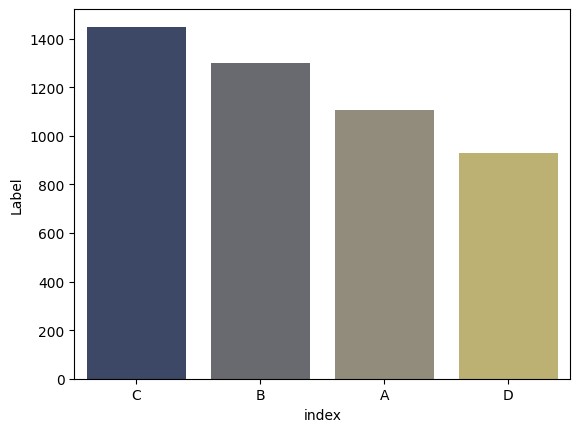

In [22]:
xx = df[["Label"][0]].value_counts().reset_index()
sns.barplot(x="index", y="Label", data= xx, palette="cividis")

In [23]:
X = df[features]
y = df.Label

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
df.columns = features + ["Label"]
df

,door_A,sens3_A,sens4_A,sens2_A,sens1_A,door_B,sens4_B,sens3_B,sens2_B,sens1_B,...,sens4_C,sens2_C,sens3_C,sense1_C,door_D,sens1_D,sens3_D,sens2_D,sens4_D,Label
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,D
5792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,D
5793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D
5794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D


  index  Label
0     A   1449
1     B   1449
2     C   1449
3     D   1449


<AxesSubplot: xlabel='index', ylabel='Label'>

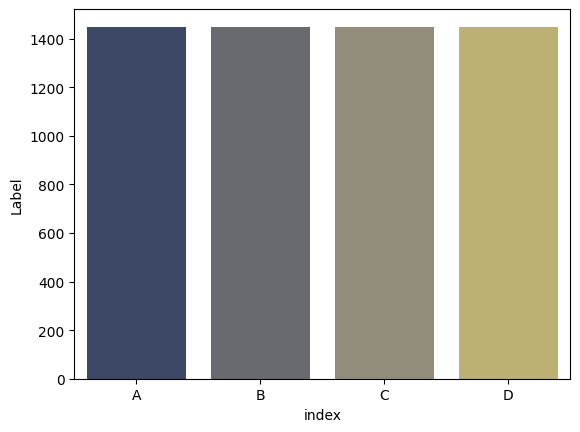

In [24]:
xx = df[["Label"][0]].value_counts().reset_index()
print(xx)
sns.barplot(x="index", y="Label", data= xx, palette="cividis")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

dump(clf, 'test.joblib') 

data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names = clf.classes_, filled=True)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('Ltrain_dtree.png')

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9959746981023577


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       418
           B       0.99      1.00      0.99       454
           C       1.00      0.99      0.99       446
           D       1.00      1.00      1.00       421

    accuracy                           1.00      1739
   macro avg       1.00      1.00      1.00      1739
weighted avg       1.00      1.00      1.00      1739

